## DTMF Project Part 3: Decoding single digit DTMF sound files from your data base

In [2]:
# Import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.io import wavfile


ModuleNotFoundError: No module named 'pandas'

**IMPORTANT NOTE: THE CSV FILE YOU HAVE FROM OUT PART TWO DOESN'T WORK WITH PART 3 SINCE IT WAS MESSED UP, THE ATTACHED SignalDataframe.csv IS THE CORRECT FILE. IT IS THE FILE I TURNED IN WITH THIS PART**

### Objective
In the second part of the project you created a data base consisting of 10000 samples of single digit signals. In this part, your task is to decode the signals, i.e. recovering the digit (or *, #) that it represents.

Remember: You need to provide references for all sources that you use.

### Tasks (30 points)

#### Task-1 (5 points)
Read in your dataset. From the dataset select a single signal and graph it for the duration of 10 milliseconds.


In [4]:
sd = pd.read_csv('SignalDataframe.csv') #Our csv file from part two didn't actually work so we had to make a new one, where we saved the variables needed to create the frequency and then used a fucntion to return the actual frequency. We did this because saving an 8000 float point long list every row for 10000 rows would create a very large file. Additionally you cannot save lists as csv files since the list has commas in it.
sd.head()

,Key,Frequency 1,Frequency 2,Phase Shift 1,Phase Shift 2
0,1,1209,697,4.247433,0.012566
1,3,1477,697,0.911062,3.625398
2,7,1209,852,2.730044,5.783672
3,4,1209,770,2.305929,0.760265
4,#,1477,941,2.560398,4.329115


In [5]:
A = .4
fs = 8000
B = 16
t = np.arange(0, 1, 1/fs)
def FrequencyMaker(row):
    y = (A * np.cos(2*np.pi*sd['Frequency 1'][row]*t + sd['Phase Shift 1'][row])) + (A*np.cos(2*np.pi*sd['Frequency 2'][row]*t + sd['Phase Shift 2'][row]))
    yq = (2**(B-1))*y
    return(yq)

In [6]:
#Since being able to take the frequencies out of the dataframe would make it very easy to determine the original key pressed, We will create a list that contains all of the frequencies, and use that as if it were the data from the dataframe.
Signal_Database = []
Key_Database = []
for x in range (10000):
    signal = FrequencyMaker(x)
    Signal_Database.append(signal)
    key = sd['Key'][x]
    Key_Database.append(key)

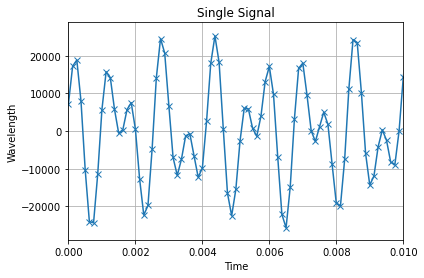

In [7]:
# Complete Task 1 here
plt.plot(t, Signal_Database[0], marker = "x")
plt.xlim([0, 0.01])
plt.xlabel("Time")
plt.ylabel("Wavelength")
plt.title("Single Signal")
plt.grid()

#### Task-2  (5 points): 
Collect ideas how you want to recover the digit from the signal. This step is called brainstorming. I want to hear YOUR ideas, not what you found on the Internet. Provide a list of 5 different ideas on how to recover the digit. Keep in mind that you will have to implement your ideas in Python, so ideas like "train your ear by listening to sounds of known digits and then listen to a sound of an unknown digit and decide which one it was" will not work. You need to use features that are quantifiable. 

In the step of brainstorming, everyone contributes and you collect ideas without critizising or discussing them. Once you have collected "enough" ideas, describe the five best.

**YOUR ANSWER GOES HERE**

 Idea 1: Find the y values when the phase shifts = 0 for each digit. Then look through random values of the Signal_Database list for a value that is equal to one the the values where the phase shifts = 0, determining which digit was pressed.

Idea 2: Similar to Idea 1 except insted of looking for a value that is equal to one of the values where the phase shift = 0. We will instead look for values in a small range of the control values. This will accomodate more for noise but be less accurate. However, I have a sneaking suspision that he bit rate will mess up idea 1 anyway since the values won't be exactly the same since the bit rate isn't infinite.

Idea 3: Write a function tests the frequency amounts for each digit(12, 11 of which need testing, since if it's not the first 11 it must be the twelth) with every possible phase shift combination (4,000,000 all will be tested because taking one off this 4 million will only save us 11 calculations, whereas every digit we don't have to test saves us 4,000,000 calculations. This save will come in real handy when we need to calculate all 10000 rows.) elif statements will be used so it doesn't continue to calculate if it found a number that works, which should approximatly half calculation time. Calculate the equation for yq with every possible combination of digit and frequency with a given value t (44,000,000 calculations max). Compare all of the values to the actual yq equation value until one comes out to be very close to correct or exactly correct.

Idea 4: Reverse engineer the equation for y to make one side of the equation be frequency 1 + frequency 2 and the other side be the rest of the equation. Test the second side of the equation with every phase shift combination and a given value t. Run this until you the first side of the equation equals a possible frequency 1 + frequency 2 combination that results in a digit. (Tested, does not work becasue reverse engineering the equation proves to be impossible or atleast above my knowledge.)

Idea 5: Find the value of the signal at t = 0, so the equation becomes y = A(cos(phase shift 1) + cos(phase shift 2)), use this to conditionally select all possible options of phase shift 1 and phase shift 2 where the sum of their cosines equals y/A. Test every one of these phase shift combinations with each digits two frequency values until the numbers match up, use the frequencies of the matching graphs to find the digit pressed.

#### Task-3  (10 points): 
Implement an algorithm that correctly decodes the digit from a given signal. Before you get started, you need to describe which approach from your list you implement. Also, for each step, provide comments.

If you want to, each team member can implement a separate approach and you can then compare and discuss results. When using concepts learned throughout the semester, refer to them and use the same "language".

I need to be able to follow your code and understand what you intend to do. If your approach does not work, I still want to hear about it. Tell me what you learned while you were implementing your ideas and why your approach did not / cannot work.

The successful completion of this task includes the demonstration of each digit (and *, #) being decoded correctly.

In [8]:
# COMPLETE TASK-3 HERE
#We chose to go with Idea 5 because it seemed like the easiest idea and also the one that would give the best results
all_phi = np.arange(0,2*np.pi,np.pi/1000) #define all possible phase shifts
phase_shift_1_database = [] #Creating empty lists to append values into later
phase_shift_2_database = []
one = [1209, 697] #The frequency values of every digit
two = [1336, 697]
three = [1477, 697]
four = [1209, 770]
five = [1336, 770]
six = [1477, 770]
seven = [1209, 852]
eight = [1336, 852]
nine = [1477, 852]
asterisk = [1209, 941]
zero = [1336, 941]
hashtag = [1477, 941]
digit_list = [one, two, three, four, five, six, seven, eight, nine, asterisk, zero, hashtag] #A list containing every list of the frequency values of every digit
def FrequencyFinder(signal, yRangeErrorMargin, signalPredictionErrorMargin):
    yq = signal[0] #Getting the signal value at t=0, since everything except the phase shifts are multiplied by t, this makes the equation simply A*(cos(phase shift 1) + cos(phase shift 2))
    y = (yq/(2**(B-1))) #Reverting the yq value back into the originial y-value
    y= y/A #divide the amplitude to get the equation y/A = cos(phase shift 1) + cos(phase shift 2)
    yRange = [y-yRangeErrorMargin, y+yRangeErrorMargin] #Setting a very small range for conditional statements since the values will not be exact
    for phaseShiftOne in all_phi: #the two for loops are for getting every possible combination of phase shifts from the set of all_phi
        cosOne = np.cos(phaseShiftOne)
        for phaseShiftTwo in all_phi:
           cosTwo = np.cos(phaseShiftTwo)
           if (cosOne + cosTwo) >= yRange[0] and (cosOne + cosTwo) <= yRange[1]: #This conditional statement checks to see if cos(phaseShift1) + cos(phaseShiftTwo) = y/A
                phase_shift_1_database.append(phaseShiftOne)
                phase_shift_2_database.append(phaseShiftTwo)
    for digit in digit_list: #Gets the frequencies for digit b
        freq_1 = digit[0]
        freq_2 = digit[1]
        for phaseShiftCombo in range (len(phase_shift_1_database)): #Sets phase_shift_1 and phase_shift_2 to the possible phase shift values for every b
            phase_shift_1 = phase_shift_1_database[phaseShiftCombo]
            phase_shift_2 = phase_shift_2_database[phaseShiftCombo]
            test_value = (A*np.cos(2*np.pi*t*freq_1 + phase_shift_1)) + (A*np.cos(2*np.pi*t*freq_2 + phase_shift_2)) #calculates a list of y values for every possible phase shift value for every b
            test_value_q = (2**(B-1))*test_value #converts the y value back into a yq value
            matched_positions = 0 #matched_positions is set to zero before checking how many values of test_value_q and signal are equal or very close to each other so that the amount of answers can be recorded in order to break the statement at a certain value
            for x in range(8000):
                if (test_value_q[x] >= (signal[x]-signalPredictionErrorMargin)) and (test_value_q[x] <= (signal[x]+signalPredictionErrorMargin)): #Checks if the value of test_value_q is equal to the value of signal for each value in the lists
                    matched_positions+=1 #Records the write answers
                    if matched_positions == 7000: #Breaks the if statement if c goes over 7000 because if the value is over 7000 then they are probably the same function, we will see how often that is correct in the next task
                        if digit == one: #Returns the digit prediction for comparison with the actual digit pressed
                            return('1')
                        elif digit == two:
                            return('2')
                        elif digit == three:
                            return('3')
                        elif digit == four:
                           return('4')
                        elif digit == five:
                            return('5')
                        elif digit == six:
                            return('6')
                        elif digit == seven:
                            return('7')
                        elif digit == eight:
                            return('8')
                        elif digit == nine:
                            return('9')
                        elif digit == asterisk:
                            return('*')
                        elif digit == zero:
                            return('0')
                        elif digit == hashtag:
                            return('#')
                        break
            if matched_positions == 7000:
                break
        if matched_positions == 7000:
            break
    if matched_positions <7000:
        print(matched_positions)
        random = np.random.choice(['1','2', '3','4', '5', '6', '7', '8', '9', '*', '0', '#'],1)
        return(random) #If no digit is found, chooses a random digit to slightly raise correct percentage. Also fixes errors involving the function not returning anything
    

In [9]:
#[0, 1][1, 3][2,7][3, 4][4, #][5, 0][6, 5][9, 6][10,9][13,*][14,8][23,2]...I just looked through the sd dataframe to test one of every digit. This is so I don't have to look through the dataframe everytime I want to write one of these lines
onePred = FrequencyFinder(Signal_Database[0], .0000001, .01) #Since there is no noise we can set the error margin very low to get a large confidence value
print('The actual digit pressed is: ' + sd['Key'][0] + ' ... the predicted digit is: ' + onePred) #prints the actual digit followed by the predicted digit
twoPred = FrequencyFinder(Signal_Database[23], .0000001, .01)
print('The actual digit pressed is: ' + sd['Key'][23] + ' ... the predicted digit is: ' + twoPred)
threePred = FrequencyFinder(Signal_Database[1], .0000001, .01)
print('The actual digit pressed is: ' + sd['Key'][1] + ' ... the predicted digit is: ' + threePred)
fourPred = FrequencyFinder(Signal_Database[3], .0000001, .01)
print('The actual digit pressed is: ' + sd['Key'][3] + ' ... the predicted digit is: ' + fourPred)
fivePred = FrequencyFinder(Signal_Database[6], .0000001, .01)
print('The actual digit pressed is: ' + sd['Key'][6] + ' ... the predicted digit is: ' + fivePred)
sixPred = FrequencyFinder(Signal_Database[9], .0000001, .01)
print('The actual digit pressed is: ' + sd['Key'][9] + ' ... the predicted digit is: ' + sixPred)
sevenPred = FrequencyFinder(Signal_Database[2], .0000001, .01)
print('The actual digit pressed is: ' + sd['Key'][2] + ' ... the predicted digit is: ' + sevenPred)
eightPred = FrequencyFinder(Signal_Database[14], .0000001, .01)
print('The actual digit pressed is: ' + sd['Key'][14] + ' ... the predicted digit is: ' + eightPred)
ninePred = FrequencyFinder(Signal_Database[10], .0000001, .01)
print('The actual digit pressed is: ' + sd['Key'][10] + ' ... the predicted digit is: ' + ninePred)
asteriskPred = FrequencyFinder(Signal_Database[13], .0000001, .01)
print('The actual digit pressed is: ' + sd['Key'][13] + ' ... the predicted digit is: ' + asteriskPred)
zeroPred = FrequencyFinder(Signal_Database[5], .0000001, .01)
print('The actual digit pressed is: ' + sd['Key'][5] + ' ... the predicted digit is: ' + zeroPred)
hashPred = FrequencyFinder(Signal_Database[4], .0000001, .01)
print('The actual digit pressed is: ' + sd['Key'][4] + ' ... the predicted digit is: ' + hashPred)

The actual digit pressed is: 1 ... the predicted digit is: 1
The actual digit pressed is: 2 ... the predicted digit is: 2
The actual digit pressed is: 3 ... the predicted digit is: 3
The actual digit pressed is: 4 ... the predicted digit is: 4
The actual digit pressed is: 5 ... the predicted digit is: 5
The actual digit pressed is: 6 ... the predicted digit is: 6
The actual digit pressed is: 7 ... the predicted digit is: 7
The actual digit pressed is: 8 ... the predicted digit is: 8
The actual digit pressed is: 9 ... the predicted digit is: 9
The actual digit pressed is: * ... the predicted digit is: *
The actual digit pressed is: 0 ... the predicted digit is: 0
The actual digit pressed is: # ... the predicted digit is: #


#### Task-4  (5 points): 
Test all 10000 signals from your data base. For each digit, state the percentage of correct determination of the number that it represents.

In [17]:
# COMPLETE TASK-4 HERE
#I am 99% sure that this will come out to have atleast 99% accuracy in 10000 attempts, but unfortunately my computer is not good enough to do this function 10000 times. By my calculations it would take around 50 hours to complete. Because of this I will only be showing 100 values, however if you would like you can change the numOfTestValues integer to 10000 if you would like to see it's actual percentage correct in a sample size of 10000
sdRowValues = np.arange(0, 10000, 1) #Getting a numpy array of all row values in sd to get a random sample of them later
numOfTestValues = 100 #Number of values we will be testing
test_Values = np.random.choice(sdRowValues, size = numOfTestValues, replace = False) #Getting a random integer list with length numOfTestValues
predictionList = [] #Empty list for appending whether the prediction waas true or false
amountCorrect = 0 #Amount of predictions that are correct must be set to zero at the beginning
amountFalse = 0 #Amount of predictions that are false must be set to zero at the beginning
for S in test_Values:
    actualDigit = sd['Key'][S] #Getting the actual digit that was pressed
    predDigit = FrequencyFinder(Signal_Database[S], 0.000001, 0.01) #Using the function from task-3 to predict the key pressed, again using low error margin values since there is no noise
    predBool = False #We assume that the prediction is false at first
    print('The actual key value is: ' + actualDigit + ' ... The predicted key value is: ' + predDigit) #Print what the actual key pressed is and what the predicted key is. This is more to keep track of how far into the calculation you are. If this stops showing up you know that the cell crashed.
    if actualDigit == predDigit: #If the actual key is the same as the predicted Key predBool is set to true
        predBool = True
    predictionList.append(predBool) #The value of predBool is then appended to the predictionList list
for x in predictionList: #runs the below conditional statements for every value in predictionList (which should be the same length as numOfTestValues)
    if x: #adds 1 to the amountCorrect int every time x is True
        amountCorrect+=1
percentageCorrect = (amountCorrect/len(predictionList))*100 #Returns the percentage of correct answers
print(percentageCorrect) #prints the percentage of correct answers

The actual key value is: 3 ... The predicted key value is: 3
The actual key value is: # ... The predicted key value is: #
The actual key value is: 0 ... The predicted key value is: 0
The actual key value is: 6 ... The predicted key value is: 6
The actual key value is: 9 ... The predicted key value is: 9
The actual key value is: 7 ... The predicted key value is: 7
The actual key value is: 5 ... The predicted key value is: 5
The actual key value is: 5 ... The predicted key value is: 5
The actual key value is: 1 ... The predicted key value is: 1
The actual key value is: # ... The predicted key value is: #
The actual key value is: * ... The predicted key value is: *
The actual key value is: 7 ... The predicted key value is: 7
The actual key value is: 8 ... The predicted key value is: 8
The actual key value is: 7 ... The predicted key value is: 7
The actual key value is: 3 ... The predicted key value is: 3
The actual key value is: 9 ... The predicted key value is: 9
The actual key value is:

As you can see the percentage correct is 100% out of 100 tries. If you would like to test it more throughly you can but I just cannot since my computer is not very good

**YOUR ANSWER GOES HERE**

Since the total correct percentage is 100% we know that the correct percentage for each digit is also 100%

#### Task-5 (5 points):
In a real-world system the signals being decoded will be corrupted by noise. In this task you are testing to what extend your approach is robost to noise. 

You are basically repeating **Task-4** but before you are starting your algorithm, you are adding noise to your signal.

noise = A*np.random.randn(1, 1000)

creates a one-dimensional array of size 1x1000 with normally distributed values. By making the amplitude A larger or smaller you adjust the noise amplitude.

How robost is your algorithm to noise? How did you test it? 

In [7]:
def FreqFinderWithNoise(signal, Amp, yErrorMargin, signalPredErrorMargin):
    noise = Amp*np.random.randn(1, 8000)
    signal_with_noise = []
    for x in range (8000):
        S = signal[x] + noise[0,x]
        signal_with_noise.append(S)
    signal_with_noise = np.array(signal_with_noise)
    digitPred = FrequencyFinder(signal_with_noise, yErrorMargin, signalPredErrorMargin)
    return(digitPred)

In [14]:
# COMPLETE TASK-5 HERE
sdRowValues = np.arange(0, 10000, 1) #Getting a numpy array of all row values in sd to get a random sample of them later
numOfTestValues = 100 #Number of values we will be testing
test_Values = np.random.choice(sdRowValues, size = numOfTestValues, replace = False) #Getting a random integer list with length numOfTestValues
predictionList = [] #Empty list for appending whether the prediction waas true or false
amountCorrect = 0 #Amount of predictions that are correct must be set to zero at the beginning
amountFalse = 0 #Amount of predictions that are false must be set to zero at the beginning
Amplitude = 1 #Amplitude of the noise. Not named A to avoid errors since the variable A is already used in the FrequencyFinder function
for test_value in test_Values:
    actualDigit = sd['Key'][test_value]
    predDigit = FreqFinderWithNoise(Signal_Database[test_value], Amplitude, .0001, 10) #Larger error margins are used since noise has been added
    predBool = False
    print('The actual key value is: ' + actualDigit + ' ... The predicted key value is: ' + predDigit) #Print what the actual key pressed is and what the predicted key is. This is more to keep track of how far into the calculation you are. If this stops showing up you know that the cell crashed.
    if actualDigit == predDigit:
        predBool = True
    predictionList.append(predBool)
for prediction in predictionList:
    if prediction:
        amountCorrect+=1
percentageCorrect = (amountCorrect/len(predictionList))*100
print('The percentage of correct predictions is: ' + str(percentageCorrect) + ' for a noise amplitude of: ' + str(Amplitude))

The actual key value is: 9 ... The predicted key value is: 9
The actual key value is: 9 ... The predicted key value is: 9
The actual key value is: 2 ... The predicted key value is: 2


KeyboardInterrupt: 

Task-5 takes even longer to predict, but seems to yield a pretty good percentage at a low amplitude(.1). Allthough a higher error margin must be used in order for the noise to not matter. The higher the amplitude the higher the error margins have to be. This higher the error margins the lower the accuracy, but the accuracy still seems to be very high until you get to extemly large amplitudes. For an amplitude of 1 and a signalPredErrorMargin of 50 percentagecorrect is still 100. At an amplitude of 10 the function fails to predict the digit. Any amplitude over 1 gets really dicey with the predictions

We tested our algorithms with different amounts of noise by changing the amplitude function. For us, when we changed the amplitude function we also had to change the margin of error for saying cos(phaseShiftOne) + cos(phaseShiftTwo) = signal[0] as well as the margin of error for the signalPredErrorMargin since the signal would be less like the original signal. For example, with no noise you can set the margin or errors to extremly low, something around 0.000000001 will most likely work, since they are going to be extremly close to the same number, but when adding noise with an amplitude of just two, the signalPredErrorMargin was increased to 500 since the signal gets very different very quickly